
## Quiero binear los ejes de una caja y tirar puntos random ignorando una celda a la vez


### Hago una caja simple con centros random

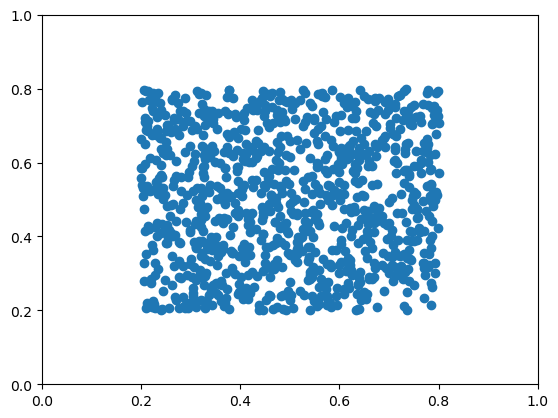

In [1]:
import numpy as np
lbox = 1
n = 1000
r = 0.2
a = r
b = lbox-r
spheres = (b-a)*np.random.rand(n,2) + a

import matplotlib.pyplot as plt

plt.xlim([0,lbox])
plt.ylim([0,lbox])
plt.scatter(spheres[:,0],spheres[:,1])
plt.show()

### Pruebo tirar centros random excepto en la celda 0.4<(x,y)<0.6 

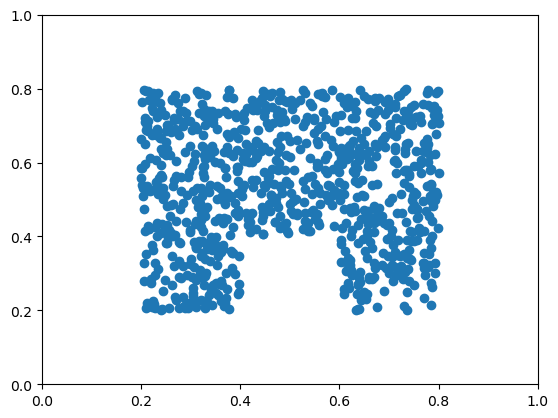

In [2]:
#Esto está en 2D
mask_x2 = (spheres[:,0] < .6)
mask_x1 = (spheres[:,0] > .4)
mask_y2 = (spheres[:,1] < .4)
mask_y1 = (spheres[:,1] > .2)
mask_x = np.logical_and(mask_x1,mask_x2)
mask_y = np.logical_and(mask_y1,mask_y2)
mask_xy = np.logical_and(mask_x,mask_y)

mask = np.invert(mask_xy)
sph = spheres[mask,:]
#sph = np.delete(spheres, mask, axis=0)

import matplotlib.pyplot as plt
plt.xlim([0,lbox])
plt.ylim([0,lbox])
plt.scatter(sph[:,0],sph[:,1])
plt.show()

### Simular jackknife resampling

[0.2 0.4 0.6 0.8]


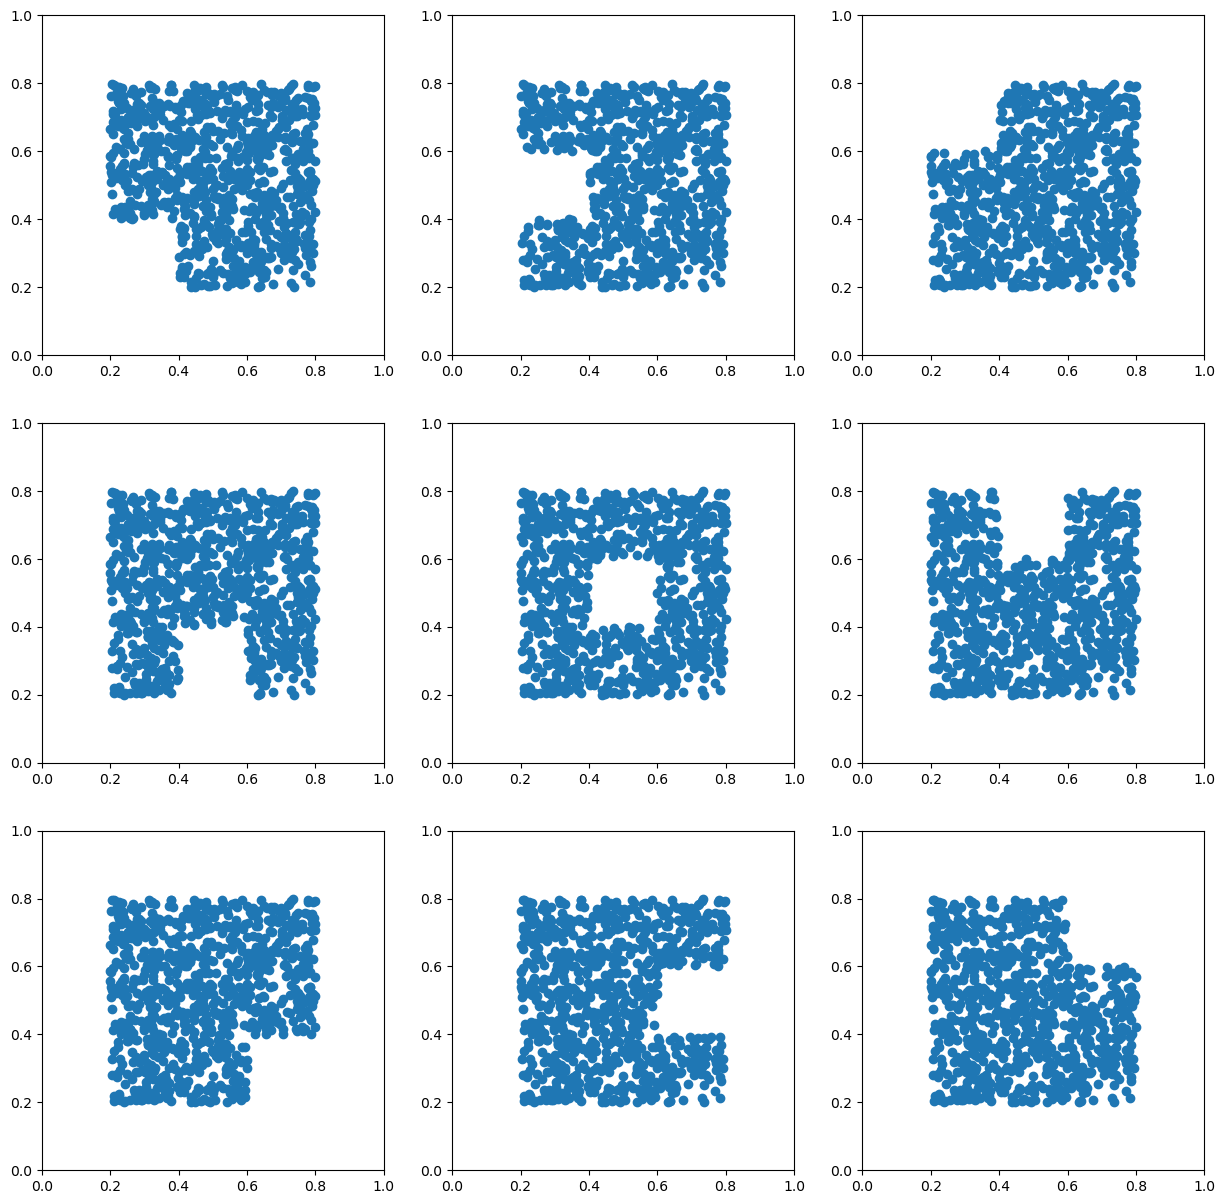

In [3]:
fig, axs = plt.subplots(3,3,figsize=(15,15))

rbins = np.linspace(0.2,0.8,4)
print(rbins)


for j in range(len(rbins)-1):
    mask_x2 = (spheres[:,0] < rbins[j+1])
    mask_x1 = (spheres[:,0] > rbins[j])
    for i in range(len(rbins)-1):
        
        mask_y2 = (spheres[:,1] < rbins[i+1])
        mask_y1 = (spheres[:,1] > rbins[i])
        mask_x = np.logical_and(mask_x1,mask_x2)
        mask_y = np.logical_and(mask_y1,mask_y2)
        mask_xy = np.logical_and(mask_x,mask_y)

        mask = np.invert(mask_xy)
        sph = spheres[mask,:]
        
        axs[j,i].scatter(sph[:,0],sph[:,1])
        axs[j,i].set_xlim([0,lbox])
        axs[j,i].set_ylim([0,lbox])

plt.show()


2000
1757
1000


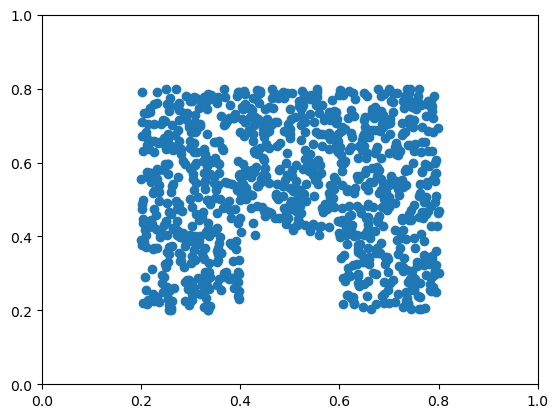

In [11]:
lbox = 1
n = 1000
r = 0.2
a = r
b = lbox-r
spheres = (b-a)*np.random.rand(n,2) + a
l = lbox/4 #side length of cell    
n_ = int(n+2*n*(l/lbox)**3) #overhead of centers to then strip off
n_ = n*2
spheres = (b-a)*np.random.rand(n_,3) + a
print(len(spheres))
#Esto está en 2D
mask_x2 = (spheres[:,0] < .6)
mask_x1 = (spheres[:,0] > .4)
mask_y2 = (spheres[:,1] < .4)
mask_y1 = (spheres[:,1] > .2)
mask_x = np.logical_and(mask_x1,mask_x2)
mask_y = np.logical_and(mask_y1,mask_y2)
mask_xy = np.logical_and(mask_x,mask_y)

mask = np.invert(mask_xy)
sph = spheres[mask,:]
print(len(sph))
sph = sph[:n]
#sph = np.delete(spheres, mask, axis=0)
print(len(sph))
import matplotlib.pyplot as plt
plt.xlim([0,lbox])
plt.ylim([0,lbox])
plt.scatter(sph[:,0],sph[:,1])
plt.show()